In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(val, name, x_label, y_label, file):
    plt.figure(figsize=(16, 9))
    plt.plot(val)
    plt.title(name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"{file}.png")
    plt.show()

In [3]:
psi = np.fromfile('wf.dat', dtype=np.cdouble)
print(psi)

NX, NY, NZ = 128, 128, 128
dx, dy, dz = 1, 1, 1

Psi_x, Psi_y, Psi_z = [], [], []

Psi_norm_x, Psi_norm_y, Psi_norm_z, Psi_pow_x, Psi_pow_y, Psi_pow_z = [], [], [], [], [], []

for ix in range(NX):
    Psi_x.append(psi[int( (NZ/2)*dz + NZ*(NY/2)*dy + NZ*NY*ix )])
    Psi_y.append(psi[int( (NZ/2)*dz + NZ*ix + NZ*NY*(NX/2)*dx )])
    Psi_z.append(psi[int( ix + NZ*(NY/2)*dy + NZ*NY*(NX/2)*dx )])

    Psi_norm_x.append(np.sqrt(np.power(np.real(Psi_x[ix]), 2) + np.power(np.imag(Psi_x[ix]), 2)))
    Psi_norm_y.append(np.sqrt(np.power(np.real(Psi_y[ix]), 2) + np.power(np.imag(Psi_y[ix]), 2)))
    Psi_norm_z.append(np.sqrt(np.power(np.real(Psi_z[ix]), 2) + np.power(np.imag(Psi_z[ix]), 2)))

    Psi_pow_x.append(np.power(np.real(Psi_x[ix]), 2) + np.power(np.imag(Psi_x[ix]), 2))
    Psi_pow_y.append(np.power(np.real(Psi_y[ix]), 2) + np.power(np.imag(Psi_y[ix]), 2))
    Psi_pow_z.append(np.power(np.real(Psi_z[ix]), 2) + np.power(np.imag(Psi_z[ix]), 2))

[1.57079298e-14-9.30705132e-14j 1.57079298e-14-9.30705132e-14j
 1.57079298e-14-9.30705132e-14j ... 3.66052774e-14-2.18573160e-13j
 3.66052774e-14-2.18573160e-13j 3.66052774e-14-2.18573160e-13j]


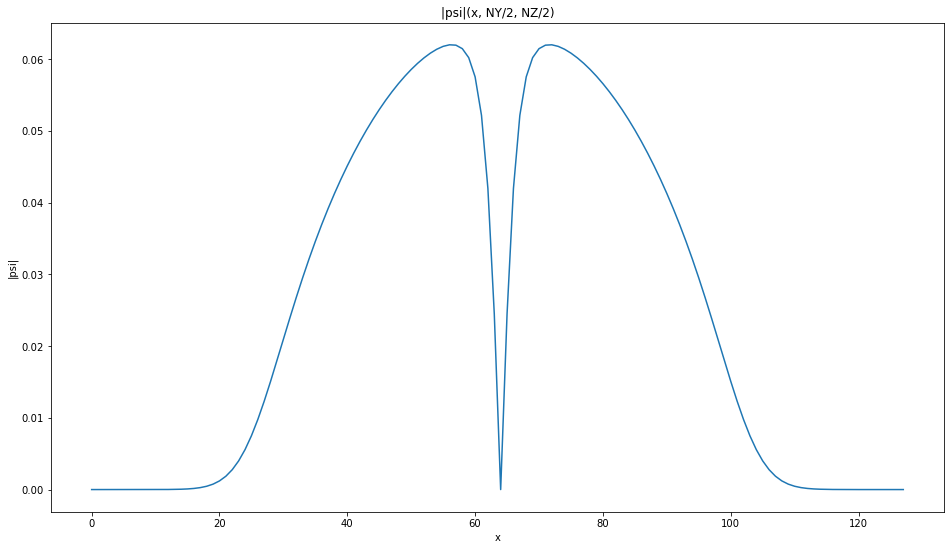

In [4]:
plot(Psi_norm_x, "|psi|(x, NY/2, NZ/2)", "x", "|psi|", "psi_x")

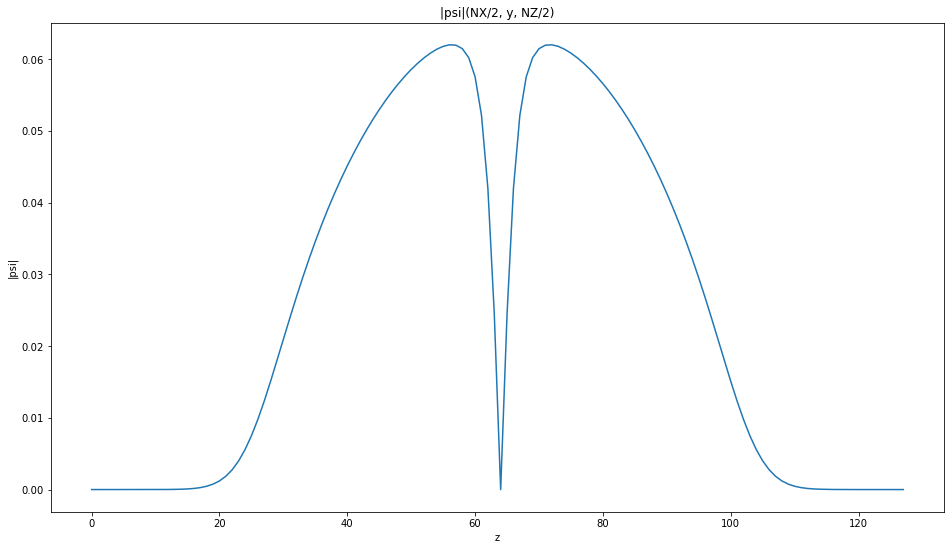

In [5]:
plot(Psi_norm_y, "|psi|(NX/2, y, NZ/2)", "z", "|psi|", "psi_y")

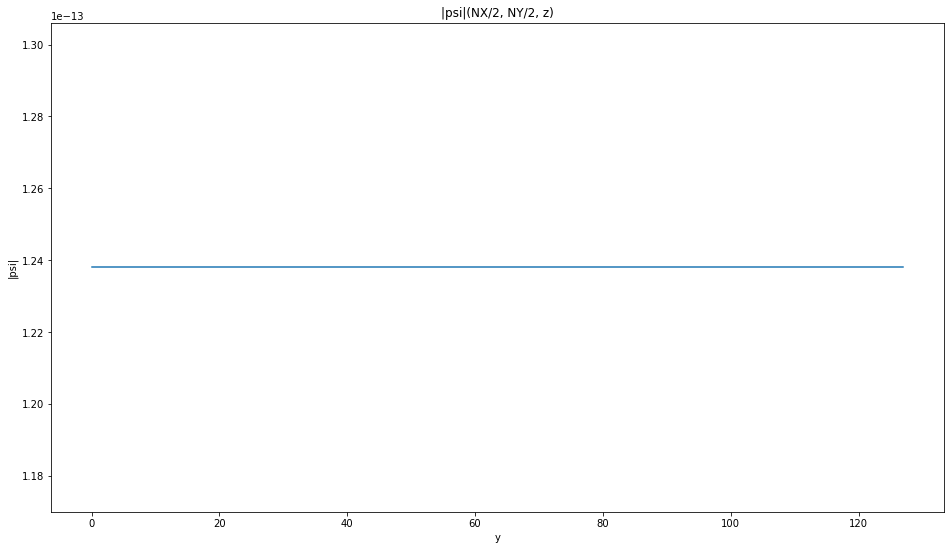

In [6]:
plot(Psi_norm_z, "|psi|(NX/2, NY/2, z)", "y", "|psi|",  "psi_z")

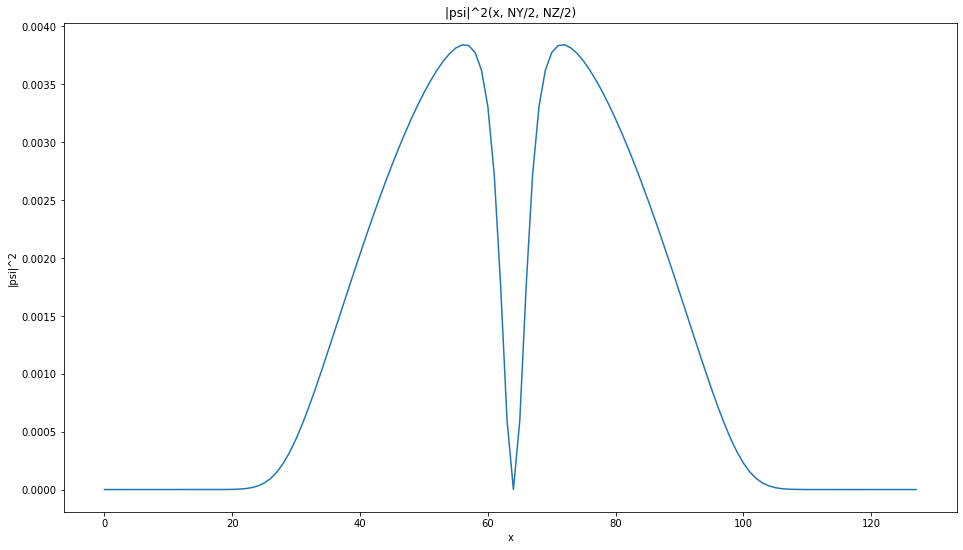

In [7]:
plot(Psi_pow_x, "|psi|^2(x, NY/2, NZ/2)", "x", "|psi|^2", "psi2_x")

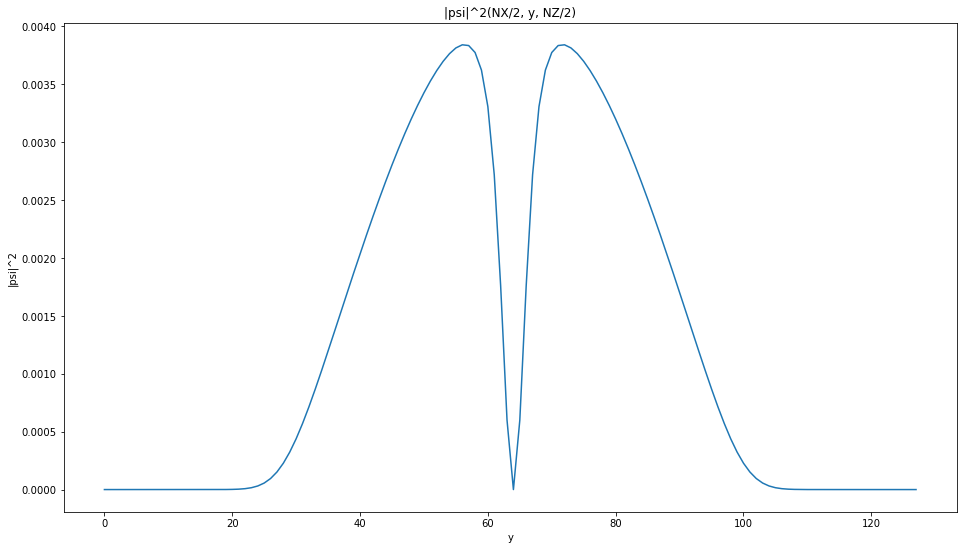

In [8]:
plot(Psi_pow_y, "|psi|^2(NX/2, y, NZ/2)", "y", "|psi|^2", "psi2_y")

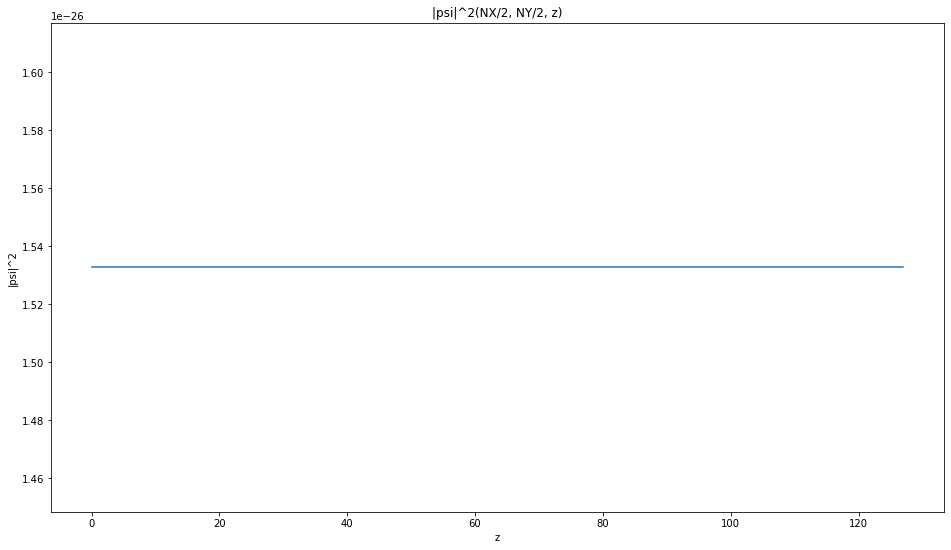

In [9]:
plot(Psi_pow_z, "|psi|^2(NX/2, NY/2, z)", "z", "|psi|^2", "psi2_z")

In [10]:
#const declaration
h_bar = 1 #(6.62607004*10**-34)/(np.pi*2)
m = 2  #6.6464731e-27 #9.10938356*10**-31

In [11]:
Psi = [[x,y,z] for x,y,z in zip(Psi_x,Psi_y,Psi_z)]

C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


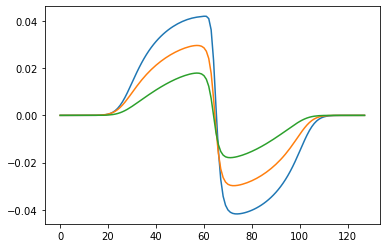

In [12]:
def divergence(F) -> np.array:   
    return np.sum(np.gradient(F),axis=0)

    
"""
    div = []
    F = np.array(F)
    for i,_ in enumerate(F):
        if i < len(F)-1:
            div.append((F[i+1]-F[i])/dx)
        if i == len(F)-1:
            div.append(0)
    
    return np.array(div)[:,np.newaxis]

div_x = divergence(Psi_x)
div_y = divergence(Psi_y)
div_z = divergence(Psi_z)

div_x2 = divergence(np.conj(Psi_x))
div_y2 = divergence(np.conj(Psi_y))
div_z2 = divergence(np.conj(Psi_z))

div = []
div2 = []
for i,_ in enumerate(div_x):
    div.append(div_x[i]+div_y[i]+div_z[i])
    div2.append(div_x2[i]+div_y2[i]+div_z2[i])
"""
plt.plot(divergence(Psi))

In [13]:
def calculate_J2(Psi):
    J = ((h_bar/(2*m*1j))*(np.multiply(np.conj(Psi),divergence(Psi))-np.multiply(Psi,divergence(np.conj(Psi)))))

    return J

In [14]:
j_2 = calculate_J2(Psi)
j_2

array([[ 5.19560138e-19+0.j,  4.95000371e-19+0.j, -1.18385679e-23-0.j],
       [ 5.07360798e-17+0.j,  2.34463412e-17+0.j, -5.25273835e-22-0.j],
       [ 1.13447524e-16+0.j,  5.47835244e-17+0.j, -7.09749009e-22-0.j],
       [ 6.61471293e-17+0.j,  3.45279702e-17+0.j, -5.23187545e-22-0.j],
       [ 1.26878793e-17+0.j,  1.15102759e-17+0.j, -1.29829345e-22-0.j],
       [-9.90352829e-18-0.j, -6.62779919e-17-0.j,  9.39020312e-23+0.j],
       [ 1.30844672e-16+0.j, -4.47502266e-16-0.j, -1.92884562e-21-0.j],
       [ 8.83762836e-15+0.j,  2.00449355e-15+0.j, -9.43122786e-21-0.j],
       [ 1.03413464e-13+0.j,  4.39568945e-14+0.j, -2.95722663e-20-0.j],
       [ 7.17116826e-13+0.j,  3.36163222e-13+0.j, -7.58137596e-20-0.j],
       [ 3.86801405e-12+0.j,  1.87013990e-12+0.j, -1.74326110e-19-0.j],
       [ 1.80285773e-11+0.j,  8.82828570e-12+0.j, -3.74723605e-19-0.j],
       [ 7.60895159e-11+0.j,  3.74875984e-11+0.j, -7.68219659e-19-0.j],
       [ 2.96974877e-10+0.j,  1.46765549e-10+0.j, -1.51615838e-1

In [15]:
j_x = [j_tmp[0] for j_tmp in j_2]
j_y = [j_tmp[1] for j_tmp in j_2]
j_z = [j_tmp[2] for j_tmp in j_2]

In [16]:
j_xnorm = [np.sqrt(np.power(np.real(x), 2) + np.power(np.imag(x), 2)) for x in j_x]
j_ynorm = [np.sqrt(np.power(np.real(y), 2) + np.power(np.imag(y), 2)) for y in j_y]
j_znorm = [np.sqrt(np.power(np.real(z), 2) + np.power(np.imag(z), 2)) for z in j_z]

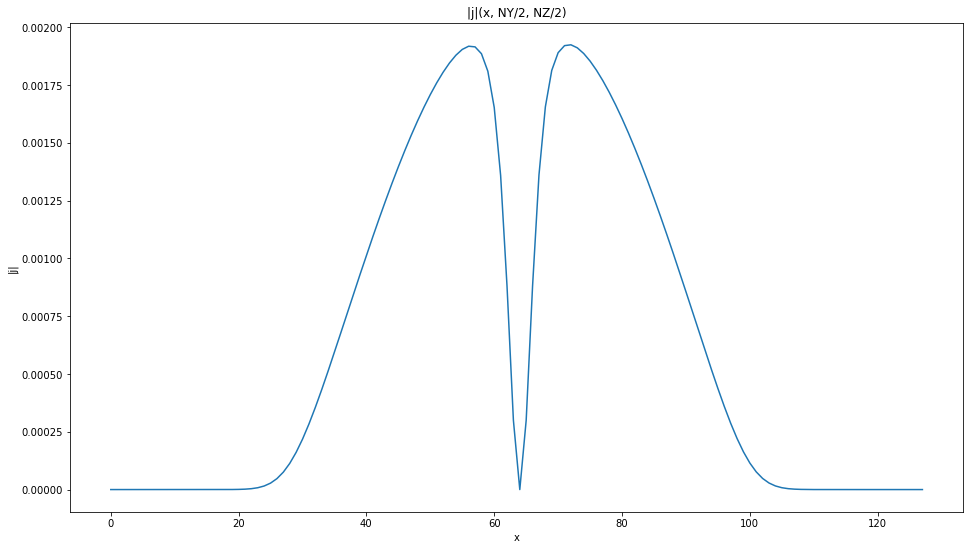

In [17]:
plot(j_xnorm, "|j|(x, NY/2, NZ/2)", "x", "|j|", "j_x")

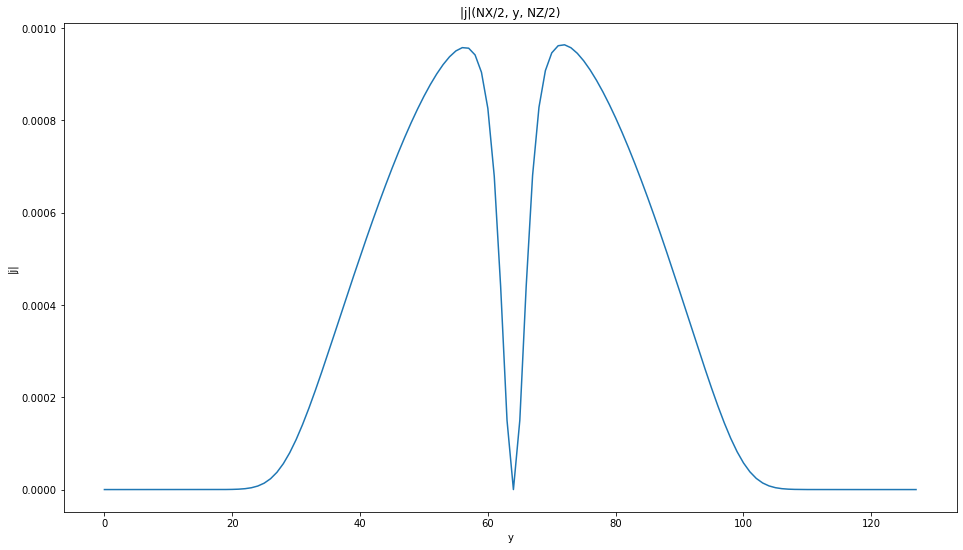

In [18]:
plot(j_ynorm, "|j|(NX/2, y, NZ/2)", "y", "|j|", "j_y")

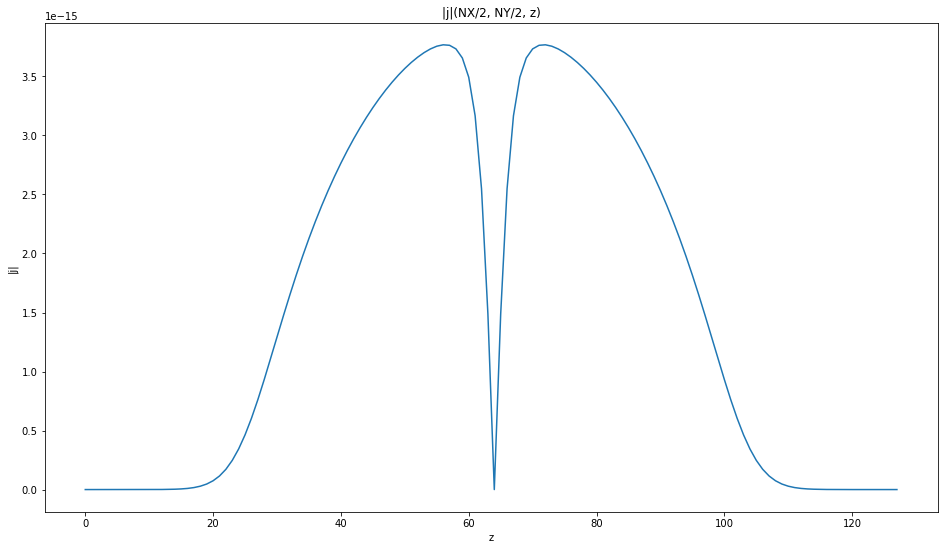

In [19]:
plot(j_znorm, "|j|(NX/2, NY/2, z)", "z", "|j|", "j_z")

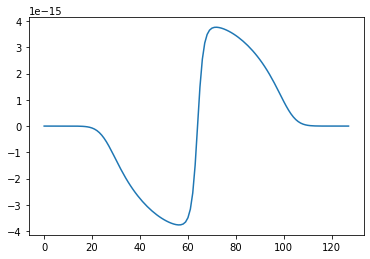

In [20]:
plt.plot(j_z)

In [21]:
Psi_norm_2 = [[x,y,z] for x,y,z in zip(Psi_pow_x,Psi_pow_y,Psi_pow_z)]

In [22]:
def Rho_calc(Psi_norm):
    Psi_norm = np.array(Psi_norm)
    
    X, Y, Z = 0, 0, 0
    for x, y, z in zip(Psi_norm[:,0],Psi_norm[:,1],Psi_norm[:,2]):
        X += x
        Y += y
        Z += z
        
    return NX*NY*NZ*X*Y*Z
    
Rho = Rho_calc(Psi_norm_2)
Rho

1.178108120419508e-19

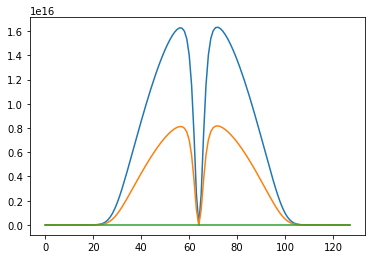

In [23]:
j_norm = [[x,y,z] for x,y,z in zip(j_xnorm, j_ynorm, j_znorm)]

v = j_norm/Rho

plt.plot(v)

In [24]:
def derivative(F,dx):
    der = []
    F = np.array(F)
    for i,_ in enumerate(F):
        if i < len(F)-1:
            der.append((F[i+1]-F[i])/dx)
        if i == len(F)-1:
            der.append(0)
    
    return np.array(der)#[:,np.newaxis]
        

def Curl(v):
    x = derivative(j_znorm,dy) - derivative(j_ynorm,dz)
    y = derivative(j_xnorm,dz) - derivative(j_znorm,dx)
    z = derivative(j_ynorm,dx) - derivative(j_xnorm,dy)
    
    return [x,y,z]
    
Omega = np.array(Curl(v))

([<matplotlib.lines.Line2D at 0x1cbf6900888>],
 [<matplotlib.lines.Line2D at 0x1cbf6900288>])

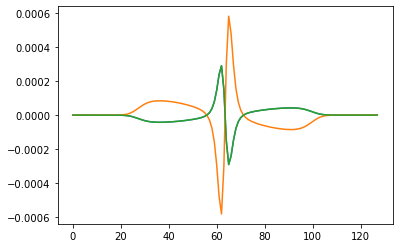

In [25]:
plt.plot(Omega[0]),plt.plot(Omega[1]),plt.plot(Omega[2])

ValueError: Argument U has a size 128 which does not match 16384, the number of arrow positions

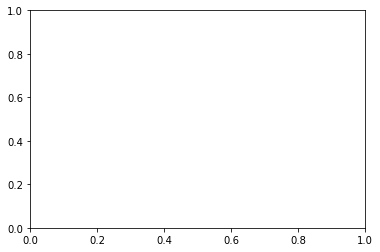

In [26]:
from mpl_toolkits.mplot3d import axes3d

xarray= np.arange(0, 128, 1)
yarray= np.arange(0, 128, 1)
x,y = np.meshgrid(xarray,yarray)

X_Omega = np.meshgrid(Omega[0])

#ax = fig.gca(projection='3d')
plt.figure()
plt.quiver(x, x, X_Omega, X_Omega, pivot='mid')
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

In [ ]:
L = []
for i, (x, y) in enumerate(zip(derivative(Psi_x,dx), derivative(Psi_y,dy))):
    L.append(1j*h_bar*(i*x - i*y))
L

In [ ]:
plt.plot(L)

In [ ]:
L = [np.sqrt(np.power(np.real(L[ix]), 2) + np.power(np.imag(L[ix]), 2)) in range(len(L)) for ix in range(len(L))]

In [ ]:
plt.plot(L)